# hIAPP WT Apo REST2 Simulation Analysis

<center> Simulation Analysis of hIAPP WT Apo REST2 300 K replica at 3.4 microseconds. There was a total of 20 replicas run in a temperature ladder from 300 - 500 K. </center>

In [154]:
import sys 
import os
sys.path.append(os.path.abspath("../scripts"))
from tools import *
import matplotlib as mpl

# set the visualization style
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
plt.rc('lines', linewidth=1)
plt.rcParams["font.size"]
plt.rcParams.update({"font.size":12, 'ytick.labelsize': '12', 'xtick.labelsize': '12', 'legend.fontsize': '10', 'axes.titlesize': '12'})
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")

In [155]:
# insert the path to the structure files, the trajectory files, the output directory, the helix pdb file
outdir = './outdir_wt_hiapp_apo/'
!mkdir $outdir
pdb = "../structure_files/hiapp_wt_apo.gro"
rep0 = outdir + '/hiapp_wt_apo_300k.xtc'
helixpdb = "../structure_files/helix_wt.pdb"

print("outdir:", outdir)
print("pdb:", pdb)
print("helix pdb:", helixpdb)
print("trjaectory:", rep0)

mkdir: ./outdir_wt_hiapp_apo/: File exists
outdir: ./outdir_wt_hiapp_apo/
pdb: ../structure_files/hiapp_wt_apo.gro
helix pdb: ../structure_files/helix_wt.pdb
trjaectory: ./outdir_wt_hiapp_apo//hiapp_wt_apo_300k.xtc


In [156]:
# Load the trajectory and system information 
trj = md.load(rep0, top=pdb, stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames = trj.n_frames
sim_length = trj.time[-1]/ 1000 # in nanoseconds 
sequence_ol_wt = ['K', 'C', 'N', 'T', 'A', 'T', 'C', 'A', 'T', 'Q', 'R', 'L', 'A', 'N', 'F', 'L', 'V', 'H', 'S', 'S', 'N', 'N', 'F', 'G', 'A', 'I', 'L', 'S', 'S', 'T', 'N', 'V', 'G', 'S', 'N', 'T', 'Y', '      NH$_2$']


nres = []
for res in trj.topology.residues:
    nres.append(res.resSeq)
sequence = (' %s' % [residue for residue in trj.topology.residues])
resname = (' %s' % [residue.name for residue in trj.topology.residues])
resindex = (' %s' % [residue.index for residue in trj.topology.residues])
prot_top = top.subset(top.select('protein'))
prot_res = []
for res in prot_top.residues:
    prot_res.append(res.resSeq)
prot_resname = (' %s' % [residue.name for residue in prot_top.residues])
residues = len(set(prot_res))

#log = open("/Users/paulrobustelli/Desktop/Sa_calc.log", "w")
print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of protein residues: %d\n" % len(set(prot_res)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue index: %s\n" % resindex)

residues = 38
residue_offset = 1 
prot_res_renum = np.asarray(prot_res)
residue_number = range(0, residues)
residue_number_offsetres = range(residue_offset, residue_offset+residues)
print("Residue Number Range:", residue_number)


** SYSTEM INFO **

Number of atoms: 537

Number of residues: 38

Number of protein residues: 37

Number of frames: 41501

Starting frame: 0

Last frame: 41501

sequence:  [LYS1, CYS2, ASN3, THR4, ALA5, THR6, CYS7, ALA8, THR9, GLN10, ARG11, LEU12, ALA13, ASN14, PHE15, LEU16, VAL17, HIS18, SER19, SER20, ASN21, ASN22, PHE23, GLY24, ALA25, ILE26, LEU27, SER28, SER29, THR30, ASN31, VAL32, GLY33, SER34, ASN35, THR36, TYR37, NH238]

residue names:  ['LYS', 'CYS', 'ASN', 'THR', 'ALA', 'THR', 'CYS', 'ALA', 'THR', 'GLN', 'ARG', 'LEU', 'ALA', 'ASN', 'PHE', 'LEU', 'VAL', 'HIS', 'SER', 'SER', 'ASN', 'ASN', 'PHE', 'GLY', 'ALA', 'ILE', 'LEU', 'SER', 'SER', 'THR', 'ASN', 'VAL', 'GLY', 'SER', 'ASN', 'THR', 'TYR', 'NH2']

residue index:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

Residue Number Range: range(0, 38)


In [157]:
# plot the timecourse 
def get_temps(nreps,tmax= 500, tmin= 300):
    """
    Compute the temperatures 
    """
    temps = []
    for i in range(0,nreps): 
        t=tmin*math.exp(i*math.log(tmax/tmin)/(nreps-1))
        temps.append(round(t,2))
    return temps

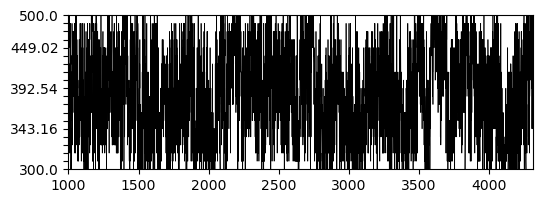

In [158]:
plt.style.use("default")
temperature = get_temps(nreps=20)
temperature_ticks = []
for n, t in enumerate(temperature): 
    if n%5 ==0: 
        temperature_ticks.append(str(t))
    else: 
        temperature_ticks.append("")
temperature_ticks[-1] = "500.0"

xvg_file = "/Users/f006j60/Robustelli_Group/IAPP/wt/replica_temp_rest2_4.3us.xvg"
xvg_20reps = np.loadtxt(xvg_file ,comments=["@", "#"])[:,1:]
rep_300k = xvg_20reps[:,0]
rep_300k = rep_300k[math.floor((10**6)/80):] # cutoff the first microsecond 


# fill between for the first half and second half
fig, axes = plt.subplots(1, 1, figsize=(6,2.0), sharex=True)
sns.lineplot(x=np.linspace(1000, 4320, len(rep_300k))[::500],y=rep_300k[::500],
    color="black", ax=axes, linewidth=0.5 )
plt.ylim(0,19)
plt.yticks(range(0,20), temperature_ticks)
plt.xlim(1000, 4320)
# plt.savefig(outdir+'300k_replica_time_evolution.pdf', dpi=300)
plt.show()

In [159]:
# get the sequence of the protein for later plots 
sequence=[]
for residue in trj.topology.residues:
    sequence.append(residue)

n=2
m = len(sequence)
for i in range (0,m): 
    if (i % n !=0):
        sequence[i] = ""

/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:63: RuntimeWarning: invalid value encountered in divide
  M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]


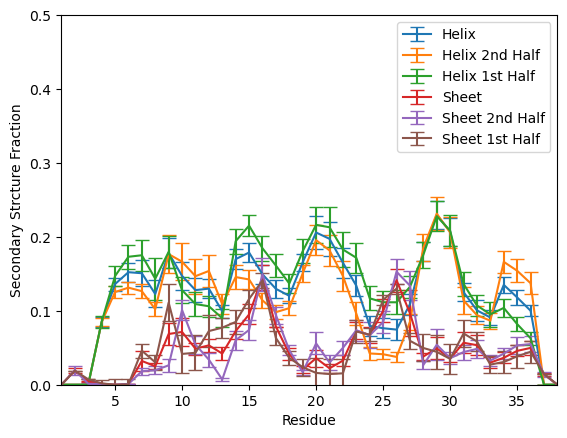

Average Helical Residues: 4.572 +_ 0.147
Average Fraction Helix: 0.124 +_ 0.004
Average Sheet Residues: 1.799 +_ 0.147
Average Fraction Sheet: 0.049 +_ 0.004


In [160]:
# compute the blocking error of the simulation to check for convergence 
trjH1 = md.load(rep0, top=pdb, stride=1)
H1 = top.select("resid 0 to 37")
trjH1.restrict_atoms(H1)
trjH1.center_coordinates()
frames = trjH1.n_frames
half = int(np.floor(frames/2))

dsspH1 = md.compute_dssp(trjH1, simplified=True)
dsspH1_h2 = md.compute_dssp(trjH1[half:-1], simplified=True)
dsspH1_h1 = md.compute_dssp(trjH1[0:half], simplified=True)

H1_H, H1_E = dssp_convert(dsspH1)
H1_H_h2, H1_E_h2 = dssp_convert(dsspH1_h2)
H1_H_h1, H1_E_h1 = dssp_convert(dsspH1_h1)

plt.errorbar(residue_number_offsetres, H1_H[:, 0], yerr=H1_H[:, 1], capsize=5, label='Helix')
plt.errorbar(residue_number_offsetres, H1_H_h2[:, 0], yerr=H1_H_h2[:, 1], capsize=5, label='Helix 2nd Half')
plt.errorbar(residue_number_offsetres, H1_H_h1[:, 0], yerr=H1_H_h1[:, 1], capsize=5, label='Helix 1st Half')
plt.errorbar(residue_number_offsetres, H1_E[:, 0], yerr=H1_E[:, 1], capsize=5, label='Sheet')
plt.errorbar(residue_number_offsetres, H1_E_h1[:, 0], yerr=H1_E_h1[:, 1], capsize=5, label='Sheet 2nd Half')
plt.errorbar(residue_number_offsetres, H1_E_h2[:, 0], yerr=H1_H_h2[:, 1], capsize=5, label='Sheet 1st Half')

plt.xlim(1, 38)
plt.ylim(0, 0.5)
plt.grid(False)
plt.legend(loc="upper right")
plt.xlabel('Residue')
plt.ylabel('Secondary Strcture Fraction')
np.savetxt(outdir+'Hprop.err.dat',
           np.column_stack((residue_number_offsetres, H1_H[:, 0], H1_H[:, 1])))
np.savetxt(outdir+'Eprop.err.dat',
           np.column_stack((residue_number_offsetres, H1_E[:, 0], H1_E[:, 1])))

plt.show()

# report helicity 
dsspH = np.copy(dsspH1)
dsspH[dsspH == 'H'] = 1
dsspH[dsspH == 'E'] = 0
dsspH[dsspH == 'C'] = 0
dsspH[dsspH == 'NA'] = 0
dsspH = dsspH.astype(int)
TotalH = np.sum(dsspH, axis=1)
np.save(outdir+"H_total" + ".npy", TotalH)

# report sheet
dsspE = np.copy(dsspH1)
dsspE[dsspE == 'H'] = 0
dsspE[dsspE == 'E'] = 1
dsspE[dsspE == 'C'] = 0
dsspE[dsspE == 'NA'] = 0
dsspE = dsspE.astype(int)
TotalE = np.sum(dsspE, axis=1)
np.save(outdir+"E_total" + ".npy", TotalE)

print("Average Helical Residues:%6.3lf" %
      (np.average(TotalH)), "+_%6.3lf" % ((block(TotalH)**.5)))
print("Average Fraction Helix:%6.3lf" %
      (np.average(TotalH)/37), "+_%6.3lf" % ((block(TotalH)**.5)/37))

print("Average Sheet Residues:%6.3lf" %
      (np.average(TotalE)), "+_%6.3lf" % ((block(TotalH)**.5)))
print("Average Fraction Sheet:%6.3lf" %
      (np.average(TotalE)/37), "+_%6.3lf" % ((block(TotalH)**.5)/37))

In [161]:
# sns.set_style("whitegrid")
plt.style.use("default")
# fill between for the first half and second half
fig, axes = plt.subplots(2, 1, figsize=(6,3.0), sharex=True)

# helix first half 
n = 0
sns.lineplot(x=residue_number_offsetres, y=H1_H_h1[:, 0],
    color="tab:purple", linewidth=2, label="1st Half" , ax=axes[n])
axes[n].fill_between(residue_number_offsetres, H1_H_h1[:, 0] + H1_H_h1[:, 1], H1_H_h1[:, 0] - H1_H_h1[:, 1], color="tab:purple", alpha=0.2)
# helix second half 
sns.lineplot(x=residue_number_offsetres, y=H1_H_h2[:, 0],
    color="black", linewidth=2, label="2nd Half" , ax=axes[n])
axes[n].fill_between(residue_number_offsetres, H1_H_h2[:, 0] + H1_H_h2[:, 1], H1_H_h2[:, 0] - H1_H_h2[:, 1], color="black", alpha=0.2)

# helix total 
sns.lineplot(x=residue_number_offsetres, y=H1_H[:, 0],
    color="tab:red", linewidth=2, label="Total" , ax=axes[n])
axes[n].fill_between(residue_number_offsetres, H1_H[:, 0] + H1_H[:, 1], H1_H[:, 0] - H1_H[:, 1], color="tab:red", alpha=0.2)

axes[n].set_xlim(1, 38)
axes[n].set_ylim(0.0, 0.5)

# sheet first half
n = 1 
sns.lineplot(x=residue_number_offsetres, y=H1_E_h1[:, 0],
    color="tab:purple", linewidth=2, label="1st Half" , ax=axes[n])
axes[n].fill_between(residue_number_offsetres, H1_E_h1[:, 0] + H1_E_h1[:, 1], H1_E_h1[:, 0] - H1_E_h1[:, 1], color="tab:purple", alpha=0.2)

# sheet second half 
sns.lineplot(x=residue_number_offsetres, y=H1_E_h2[:, 0],
    color="black", linewidth=2, label="2nd Half" , ax=axes[n])
axes[n].fill_between(residue_number_offsetres, H1_E_h2[:, 0] + H1_E_h2[:, 1], H1_E_h2[:, 0] - H1_E_h2[:, 1], color="black", alpha=0.2)

sns.lineplot(x=residue_number_offsetres, y=H1_E[:, 0],
    color="tab:red", linewidth=2, label="Total" , ax=axes[n])
axes[n].fill_between(residue_number_offsetres, H1_E[:, 0] + H1_E[:, 1], H1_E[:, 0] - H1_E[:, 1], color="tab:red", alpha=0.2)

axes[n].set_xlim(1, 38)
axes[n].set_ylim(0.0, 0.5)


# legend and labels 
axes[0].legend(fontsize=10, ncol = 3)
axes[1].legend(labels=[], frameon=False)
ax2 = axes[0].twiny()
top_ticks = np.arange(0, 38, 1)
plt.grid(True)
plt.tight_layout()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_wt[0::1]], fontsize=8)
ax2.grid(False)

# plt.savefig(outdir+'secondary_structure_fraction_convergence.pdf', dpi=300)

<center> The algorithm CheSpi was used to predict the secondary structure shifts of BMRB entry 34069. Here we load in that prediction file, and also load in the weights from a maximum entropy reweighting scheme. </center>

In [162]:
# load the chespi bmrb output 
chespi_bmrb_34069 = np.loadtxt(outdir+"/BMRB_34069.chespi.txt", dtype={'names': ( "res", "num", "Helix","x1", "x2", "Beta"),'formats': ('S1',"f4", "f4","f4", "f4","f4")})
weight_file=os.path.join("/Users/f006j60/git/hIAPP_monomer_simulations/wt_hiapp_apo/wt_hiapp_reweight/reweight/weights/combined_data/CA-CB-H-N/weights_final.dat")

# counting helical propensities from dssp assignments 
dsspH=np.copy(dsspH1)
dsspH[dsspH=='H']=1
dsspH[dsspH=='E']=0
dsspH[dsspH=='C']=0
dsspH[dsspH=='NA']=0
dsspH = dsspH[:-1]
dsspH=dsspH.astype(int)
Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspH)
dsspH = dsspH[1:,:]
print(len(dsspH))

# reweighting the helical propensities 
weights=np.loadtxt(weight_file)
reweight_Hprop=[]
for i in residue_number:
    reweight_Hprop.append(np.dot(dsspH[:,i],weights))

41499


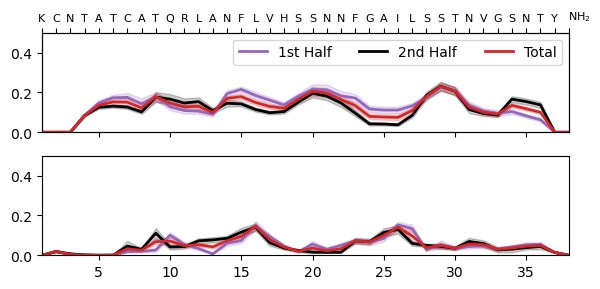

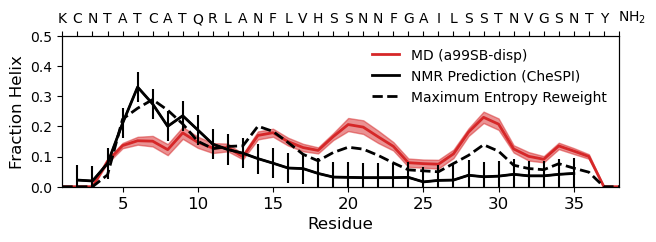

In [163]:
fig, axes = plt.subplots(figsize=(6.5,2.5))

plt.plot(residue_number_offsetres, H1_H[:, 0], label='MD (a99SB-disp)', color = "tab:red", linewidth="2")
plt.fill_between(residue_number_offsetres, H1_H[:,0] + H1_H[:, 1], H1_H[:,0] - H1_H[:, 1], color="tab:red", alpha=0.5)

plt.plot(chespi_bmrb_34069["num"], chespi_bmrb_34069["Helix"], color="black", label="NMR Prediction (CheSPI)",linewidth=2)
# plt.fill_between(chespi_bmrb_34069["num"], chespi_bmrb_34069["Helix"] +0.05, chespi_bmrb_34069["Helix"] - 0.05, color="black", alpha=0.5)
plt.errorbar(chespi_bmrb_34069["num"], chespi_bmrb_34069["Helix"], yerr=0.05, alpha=1, color="k")
# plt.errorbar(chespi_bmrb_34069["num"], chespi_bmrb_34069["Beta"], yerr=0.10, label="CheSpi Sheet", color="red")

plt.plot(residue_number_offsetres, reweight_Hprop, label="Maximum Entropy Reweight", color = "black", linestyle="--", linewidth=2)
# plt.errorbar(residue_number_offsetres,reweight_Hprop,yerr= H1_H[:, 1], color="tab:red")
# plt.fill_between(residue_number_offsetres, reweight_Hprop + H1_H[:, 1], reweight_Hprop - H1_H[:, 1], color="tab:red", alpha=0.5)

# plt.errorbar(hres_renum, H1_H[:, 0], yerr=H1_H[:, 1], capsize=5, label='Helix')
# plt.errorbar(hres_renum, H1_E[:, 0], yerr=H1_E[:, 1], capsize=5, label='Sheet')



plt.ylim(0,0.5)
plt.legend(loc="upper right", frameon=False, fontsize=10)
plt.xlabel('Residue', fontsize=12)
plt.ylabel('Fraction Helix', fontsize=12)
plt.xticks(np.arange(0,40,5), fontsize=12)
plt.xlim(1,38)

ax2 = axes.twiny()
top_ticks = np.arange(0, 38, 1)
plt.grid(True)
plt.tight_layout()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_wt[0::1]], fontsize=10)
ax2.grid(False)

plt.savefig(outdir+'NMR_Validation_CheSPI_MD.pdf', dpi=300, bbox_inches='tight')
plt.savefig(outdir+'NMR_Validation_CheSPI_MD.svg', dpi=300, bbox_inches='tight')

plt.show()

In [164]:
print("Average reweighted Helical Residues:%6.3lf" % np.dot(TotalH[1:-1], weights))
print("Average reweighted Fraction Helix:%6.3lf" % (np.dot(TotalH[1:-1], weights)/37))

print("Average reweighted Sheet Residues:%6.3lf" % np.dot(TotalE[1:-1], weights))
print("Average reweighed Fraction Sheet:%6.3lf" % (np.dot(TotalE[1:-1], weights)/37))

Average reweighted Helical Residues: 4.061
Average reweighted Fraction Helix: 0.110
Average reweighted Sheet Residues: 2.136
Average reweighed Fraction Sheet: 0.058


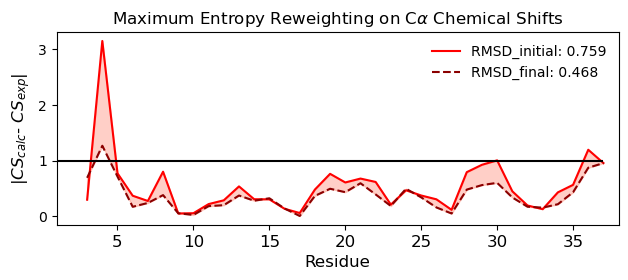

In [165]:
arr = np.loadtxt("/Users/f006j60/git/hIAPP_monomer_simulations/wt_hiapp_apo/wt_hiapp_reweight/reweight/CA.reweight.dev.dat")

rmsd_i = 0.759
rmsd_f = 0.468

plt.figure(figsize=(7.25,2.5))
plt.plot(arr[:,0], arr[:,1], color='red',
            label="RMSD_initial:%6.3lf" % rmsd_i)
plt.plot(arr[:,0], arr[:,2], color='darkred', linestyle='dashed',
            label="RMSD_final:%6.3lf" % rmsd_f)
plt.fill_between(arr[:,0], arr[:,2], arr[:,1],
                    color='tomato', alpha=0.3)

plt.ylabel(r'|$CS_{calc}$- $CS_{exp}$|', fontsize=12)
plt.title(r"Maximum Entropy Reweighting on C$\alpha$ Chemical Shifts", fontsize=12)
plt.hlines(1.0, 1, 37, colors="k")
plt.grid(False)
plt.xlabel('Residue', fontsize=12)
plt.legend(loc='upper right',fontsize=10,ncol= 1, frameon=False,)
plt.xticks(np.arange(0,40,5), fontsize=12)
plt.xlim(1, 38)
t = "CA"
plt.savefig('%s/%s.reweight.dev.pdf' % (outdir, t), bbox_inches='tight') # 
plt.show()

In [166]:
# calculate the bend
dssp = md.compute_dssp(trj, simplified=False)
dsspS = np.copy(dssp)
dsspT = np.copy(dssp)
dsspS[dsspS == 'H'] = 0
dsspS[dsspS == 'G'] = 0
dsspS[dsspS == 'I'] = 0
dsspS[dsspS == 'B'] = 0
dsspS[dsspS == 'E'] = 0
dsspS[dsspS == 'T'] = 0
dsspS[dsspS == 'S'] = 1
dsspS[dsspS == 'NA'] = 0
dsspS[dsspS == ' '] = 0
dsspS[dsspS == ''] = 0
dsspS = dsspS.astype(int)


dsspT = np.copy(dssp)
dsspT[dsspT == 'H'] = 0
dsspT[dsspT == 'G'] = 0
dsspT[dsspT == 'I'] = 0
dsspT[dsspT == 'B'] = 0
dsspT[dsspT == 'E'] = 0
dsspT[dsspT == 'T'] = 1
dsspT[dsspT == 'S'] = 0
dsspT[dsspT == 'NA'] = 0
dsspT[dsspT == ' '] = 0
dsspT[dsspT == ''] = 0
dsspT = dsspT.astype(int)

TotalS = np.sum(dsspS, axis=1)
print("Average Bend Residues:%6.3lf" %
      (np.average(TotalS)), "+_%6.3lf" % ((block(TotalS)**.5)))

TotalT = np.sum(dsspT, axis=1)
print("Average Bend Residues:%6.3lf" %
      (np.average(TotalT)), "+_%6.3lf" % ((block(TotalT)**.5)))

Average Bend Residues: 6.011 +_ 0.076
Average Bend Residues: 6.939 +_ 0.091


In [167]:
# convert bend into per residue propensities and save 
SE_S = np.zeros((len(dsspS[0]), 2))

for i in range(0, len(dsspS[0])):
    data = dsspS[:, i].astype(float)
    if(np.mean(data) > 0):
        SE_S[i] = [np.mean(data), (block(data))**.5]


np.savetxt(outdir+'Sprop.err.dat',
           np.column_stack((residue_number_offsetres, SE_S[:, 0], SE_S[:, 1])))

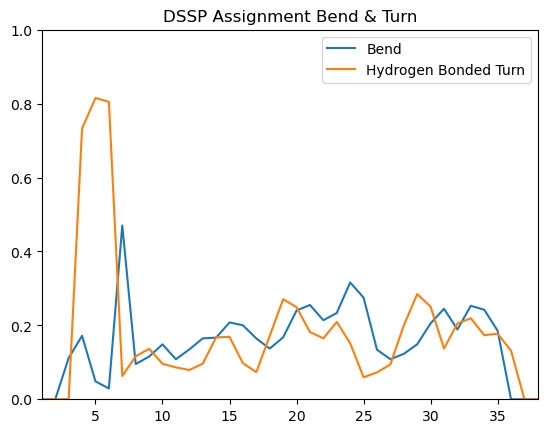

In [168]:
plt.plot(residue_number_offsetres, np.average(dsspS, axis=0), label = "Bend")
plt.plot(residue_number_offsetres, np.average(dsspT, axis=0), label="Hydrogen Bonded Turn")

plt.title("DSSP Assignment Bend & Turn")
plt.ylim(0.0, 1.0)
plt.xlim(1, 38)
plt.legend()
plt.show()

CA Radius of Gyration: 1.303 +_ 0.010
CA reweighted Radius of Gyration: 1.348
1st Half CA Radius of Gyration: 1.313 +_ 0.017
2nd Half CA Radius of Gyration: 1.294 +_ 0.009


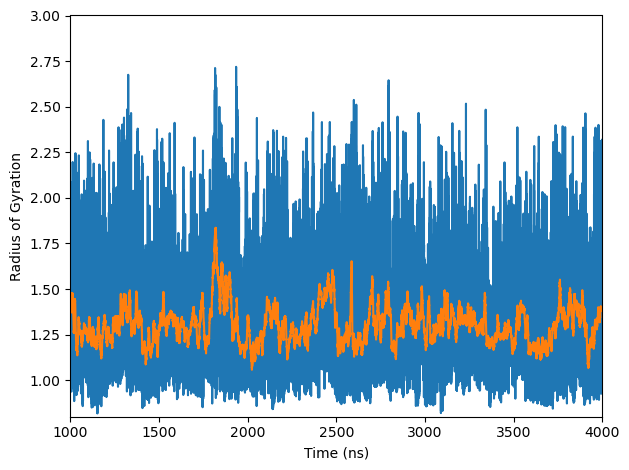

In [169]:
mass = []
for at in trj.topology.atoms:
    mass.append(at.element.mass)
mass_CA = len(mass)*[0.0]
# put the CA entries equal to 1.0
for i in trj.topology.select("name CA"):
    mass_CA[i] = 1.0
# calculate CA radius of gyration
rg_CA = md.compute_rg(trj, masses=np.array(mass_CA))
np.save(outdir+"Rg_total" + ".npy", rg_CA)

# SE_rg=(block(rg_all))**.5
time = np.linspace(1000, 4000, trj.n_frames)
plt.clf()
plt.plot(time, rg_CA)
N = 100
plt.plot(time[:41402], np.convolve(rg_CA, np.ones(N)/N, mode='valid'))
plt.xlabel('Time (ns)')
plt.ylabel('Radius of Gyration')
plt.ylim(0.8, 3.0)
plt.xlim(1000, 4000)
plt.tight_layout()

print("CA Radius of Gyration:%6.3lf" %
      np.average(rg_CA), "+_%6.3lf" % block(rg_CA)**.5)

reweight_rg_ca = np.dot(rg_CA[1:-1],weights)
print("CA reweighted Radius of Gyration:%6.3lf" %
      np.average(reweight_rg_ca))

print("1st Half CA Radius of Gyration:%6.3lf" % np.average(
    rg_CA[0:half]), "+_%6.3lf" % block(rg_CA[0:half])**.5)
print("2nd Half CA Radius of Gyration:%6.3lf" % np.average(
    rg_CA[half:-1]), "+_%6.3lf" % block(rg_CA[half:-1])**.5)

# plt.savefig(outdir+'rg.pdf', dpi=200)
np.savetxt(outdir+'rg.dat', rg_CA)
plt.show()

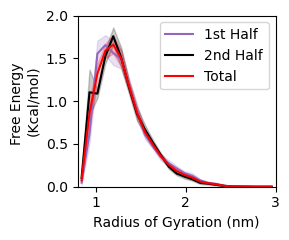

In [170]:
Rg_unbound_h1, edges_h1, u_err_h1 = histo_blockerror(rg_CA[0:half], 0.8, 3.0, 25, 5)
Rg_unbound_h2, edges_h2, u_err_h2 = histo_blockerror(rg_CA[half:-1], 0.8, 3.0, 25, 5)
Rg_unbound, edges, u_err = histo_blockerror(rg_CA, 0.8, 3.0, 25, 5)

plt.figure(figsize=(3.0, 2.5))
plt.plot(edges_h1, Rg_unbound_h1, c='tab:purple', label='1st Half')
plt.fill_between(edges_h1, Rg_unbound_h1-u_err_h1, Rg_unbound_h1 +
                 u_err_h1, color='tab:purple', alpha=0.2)

plt.plot(edges_h2, Rg_unbound_h2, c='black', label='2nd Half')
plt.fill_between(edges_h2, Rg_unbound_h2-u_err_h2, Rg_unbound_h2 +
                 u_err_h2, color='black', alpha=0.2)

plt.plot(edges, Rg_unbound, c='red', label='Total')
plt.fill_between(edges, Rg_unbound-u_err, Rg_unbound +
                 u_err, color='red', alpha=0.2)

plt.xlim(0.8, 3.0)
plt.ylim(0,2)
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Free Energy \n(Kcal/mol)')
plt.tight_layout()
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(outdir+'Rg_CA_convergence.pdf', dpi=300)
plt.show()

Compute rh values according to the following script info: https://www.biorxiv.org/content/10.1101/679373v2

In [171]:
CA_atoms = trj.topology.select("name CA")
ca_trj = trj.atom_slice(CA_atoms, inplace=True)
rg = md.compute_rg(ca_trj)

Rg = rg * 10 

N = ca_trj.n_residues

def getRh(rg, N): 
    a1 = 0.216
    a2 = 4.06 
    a3 = 0.821

    return (rg) / ((a1*(rg-a2*N**(0.33)))/(N**(0.60)- N**(0.33))+a3)
Rh = getRh(Rg, N)/10

print("CA Hydrodynamic Radius:%6.3lf" %
      np.average(Rh), "+_%6.3lf" % block(Rh)**.5)
print("1st Half CA Hydrodynamic Radius:%6.3lf" % np.average(
    Rh[0:half]), "+_%6.3lf" % block(Rh[0:half])**.5)
print("2nd Half CA Hydrodynamic Radius:%6.3lf" % np.average(
    Rh[half:-1]), "+_%6.3lf" % block(Rh[half:-1])**.5)

CA Hydrodynamic Radius: 1.597 +_ 0.004
1st Half CA Hydrodynamic Radius: 1.601 +_ 0.006
2nd Half CA Hydrodynamic Radius: 1.593 +_ 0.005


The first microsecond of the simulation was truncated due to the slow equilibration of the alpha-helical RMSD 

Sα: 1.832 +_ 0.165


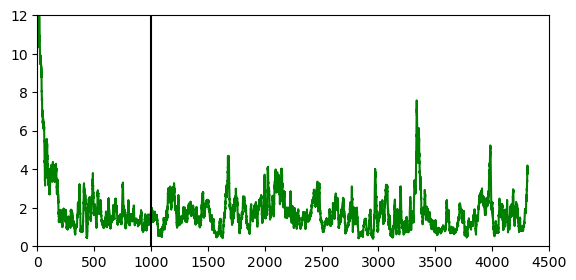

In [172]:
plt.style.use("default")
trj_untrunc = md.load("/Users/f006j60/Robustelli_Group/IAPP/wt/pbc_trj_4us/pbc_1.xtc", top=pdb, stride=1)
helix = md.load_pdb(helixpdb)
top_helix = helix.topology
backbone_helix = top_helix.select("name CA")
backbone = top.select("name CA")

RMS_start = 1
RMS_stop = 31
RMS = []
for i in range(RMS_start, RMS_stop):
    sel = top_helix.select("residue %s to %s and name CA" % (i, i+6))
    rmsd = md.rmsd(trj_untrunc, helix, atom_indices=sel)
    RMS.append(rmsd)
RMS = np.asarray(RMS)
RMS

Sa_sum = np.zeros((trj_untrunc.n_frames))
Sa = (1.0-(RMS/0.10)**8)/(1-(RMS/0.10)**12)
Sa_ave = np.average(Sa, axis=1)
Sa_total = np.sum(Sa, axis=0)

print("Sα:%6.3lf" % np.average(Sa_total),
      "+_%6.3lf" % block(Sa_total)**.5)

# plt.plot(Sa_total, label='Full', c='g')
# plt.legend()
# plt.xlabel('Frames', size=18)
# plt.ylabel('Sα', size=18)
# plt.tick_params(labelsize=18)
# plt.tight_layout()
# plt.ylim(0, 20)
# plt.savefig(outdir+'Sa.timecourse_untruncated.png', dpi=200)
np.savetxt(outdir+'Sa_total_untruncated.dat', Sa_total)
# plt.show()
# plt.clf()

N = 100
plt.figure(figsize=(6.6, 3))
plt.plot((trj_untrunc.time/1000)[:53902], np.convolve(Sa_total, np.ones(N)/N, mode='valid'), label='Full', c='g')
plt.vlines(1000, 0, 12, colors="k")
# plt.xlabel('Time (ns)')
# plt.ylabel('Sα')
plt.xlim(0, 4500)
plt.ylim(0, 12)
plt.savefig(outdir+'Sa.timecourse.smooth.untrunc.pdf', dpi=300)
plt.show()
plt.clf()

del trj_untrunc

In [173]:
trj = md.load(rep0, top=pdb, stride=1)
helix = md.load_pdb(helixpdb)
top_helix = helix.topology
backbone_helix = top_helix.select("name CA")
backbone = top.select("name CA")

print("Number of residues: %d\n" % len(set(nres)))
RMS_start = 1
RMS_stop = 31
RMS = []
for i in range(RMS_start, RMS_stop):
    sel = top_helix.select("residue " + str(i) + " to " + str(i+6)+  " and name CA")
    rmsd = md.rmsd(trj, helix, atom_indices=sel)
    RMS.append(rmsd)
RMS = np.asarray(RMS)

Sa_sum = np.zeros((trj.n_frames))
Sa = (1.0-(RMS/0.10)**8)/(1-(RMS/0.10)**12)
Sa_ave = np.average(Sa, axis=1)
Sa_total = np.sum(Sa, axis=0)

print("Sα:%6.3lf" % np.average(Sa_total),
      "+_%6.3lf" % block(Sa_total)**.5)
print("Reweighted Sα:%6.3lf" % np.dot(Sa_total[1:-1], weights))

N = 300
plt.plot(Sa_total, label='Full', c='g')
plt.legend()
plt.xlabel('Frames', size=18)
plt.ylabel('Sα', size=18)
plt.tick_params(labelsize=18)
plt.tight_layout()
plt.ylim(0, 20)
np.save(outdir+"Sa_total" + ".npy", Sa_total)
# plt.savefig(outdir+'Sa.timecourse.png', dpi=200)
np.savetxt(outdir+'Sa_total.dat', Sa_total)

Number of residues: 38

Sα: 1.689 +_ 0.088
Reweighted Sα: 1.680


In [174]:
N = 100
time = np.linspace(0,sim_length, trj.n_frames)
plt.plot(time[:41402], np.convolve(Sa_total, np.ones(N)/N, mode='valid'), label='Full', c='g')
plt.legend()
plt.xlabel('Time (ns)', size=18)
plt.ylabel('Sα', size=18)
plt.tick_params(labelsize=18)
plt.tight_layout()
plt.ylim(0, 25)
# plt.savefig(outdir+'Sa.timecourse.smooth.png', dpi=200)

(0.0, 25.0)

[0.002 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.572 0.141 0.091 0.069 0.039 0.031 0.022 0.013 0.014 0.005 0.001 0.000
 0.001 0.002 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]


/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:104: RuntimeWarning: invalid value encountered in divide
  ferr = -(0.001987*T)*(error / average)


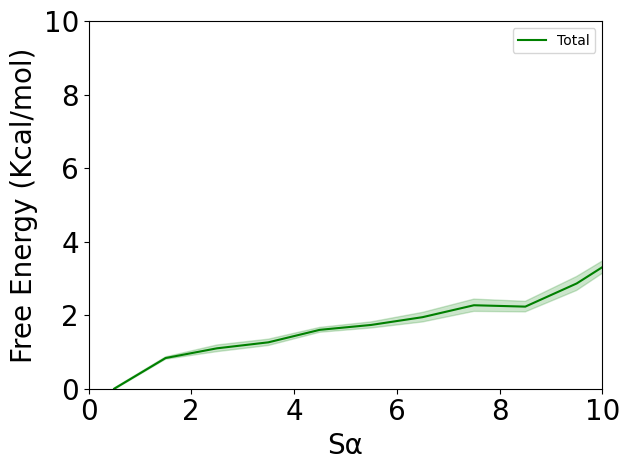

In [175]:
Sa_dg, edges, Sa_err = free_energy_1D_blockerror(Sa_total, 300, 0, 25, 25, 5)
plt.clf()
plt.plot(edges, Sa_dg, c='g', label='Total')
plt.fill_between(edges, Sa_dg-Sa_err, Sa_dg+Sa_err, color='g', alpha=0.2)


plt.legend()

plt.ylim(0, 10)
plt.xlim(0, 10)
plt.xlabel('Sα', size=20)
plt.ylabel('Free Energy (Kcal/mol)', size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(size='20')
plt.yticks(size='20')
plt.tight_layout()
# np.savetxt(outdir+'Sa_dg.dat', np.column_stack((edges, Sa_dg, Sa_err)))
# plt.savefig('%s/Sa.dG.png' % outdir)
plt.show()

[0.002 0.001 0.002 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.515 0.151 0.125 0.077 0.041 0.036 0.021 0.015 0.017 0.002 0.001 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.001 0.001 0.000 0.002 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.629 0.131 0.056 0.061 0.037 0.027 0.023 0.010 0.010 0.007 0.001 0.000
 0.002 0.003 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.002 0.000 0.001 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]
[0.572 0.141 0.091 0.069 0.039 0.031 0.022 0.013 0.014 0.005 0.001 0.000
 0.001 0.002 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000]


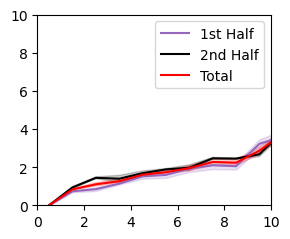

In [176]:
Sa_unbound_h1, edges_h1, u_err_h1 = free_energy_1D_blockerror(Sa_total[0:half], 300, 0, 25, 25, 5)
Sa_unbound_h2, edges_h2, u_err_h2 = free_energy_1D_blockerror(Sa_total[half:-1],300, 0, 25, 25, 5)
Sa_unbound, edges, u_err = free_energy_1D_blockerror(Sa_total,300, 0, 25, 25, 5)

plt.figure(figsize=(3.0, 2.5))
plt.plot(edges_h1, Sa_unbound_h1, c='tab:purple', label='1st Half')
plt.fill_between(edges_h1, Sa_unbound_h1-u_err_h1, Sa_unbound_h1 +
                 u_err_h1, color='tab:purple', alpha=0.2)

plt.plot(edges_h2, Sa_unbound_h2, c='black', label='2nd Half')
plt.fill_between(edges_h2, Sa_unbound_h2-u_err_h2, Sa_unbound_h2 +
                 u_err_h2, color='black', alpha=0.2)

plt.plot(edges, Sa_unbound, c='red', label='Total')
plt.fill_between(edges, Sa_unbound-u_err, Sa_unbound +
                 u_err, color='red', alpha=0.2)

plt.xlim(0.0, 10.0)
plt.ylim(0,10.0)
# plt.xlabel('Radius of Gyration (nm)')
# plt.ylabel('Free Energy \n(Kcal/mol)')
plt.tight_layout()
plt.legend(loc='upper right')
plt.tight_layout()
# plt.savefig(outdir+'Sa_total_convergence.pdf', dpi=300)
plt.show()

In [177]:

def calc_err(contact_binary, name):
    boundfrac_by_frame = []
    t2 = []
    err_by_frame = []
    err_upper = []
    err_lower = []
    time = np.linspace(0, sim_length, len(rg_CA))
    stride = 100
    for i in range(stride, len(contact_binary), stride):
        Data = np.asarray(contact_binary[0:i])
        bf, be = get_blockerror_pyblock_nanskip(Data)
        boundfrac_by_frame.append(bf)
        err_by_frame.append(be)
        err_upper.append(bf-be)
        err_lower.append(bf+be)
        t2.append(time[i])

    np.savetxt(name, np.column_stack((t2, boundfrac_by_frame, err_upper, err_lower)), '%.4f')

calc_err(rg_CA, outdir + 'rg.be.dat')
calc_err(Sa_total, outdir + 'Sa.be.dat')


In [178]:
##### run the first time through to get the contact maps and distances #####

# contact_maps = []
# contact_distances = []
# for i in residue_number:
#     contact_map = []
#     contact_distance = []
#     for j in residue_number:
#         if i == j:
#             contacts = 0
#         else:
#             dist = md.compute_contacts(trj, [[i, j]])
#             array = np.asarray(dist[0]).astype(float)
#             distance = np.average(array)
#             contact_distance.append(distance)
#             contact = np.where(array < 0.8, 1, 0)
#             contacts = np.average(contact)
#         contact_map.append(contacts)
#     contact_maps.append(contact_map)
#     contact_distances.append(contact_distance)
# final_map = np.asarray(contact_maps).astype(float)
# final_distance = np.asarray(contact_distances).astype(float)
# np.savetxt(outdir+'contactmap.dat', final_map)


In [179]:
sequence_ol = []
for i in range(0, len(sequence)):
    sequence_ol.append(str(trj.topology.residue(i).code))
sequence_ol = sequence_ol[:-1]
sequence_ol.append("    NH2") # append NH2

<Figure size 640x480 with 0 Axes>

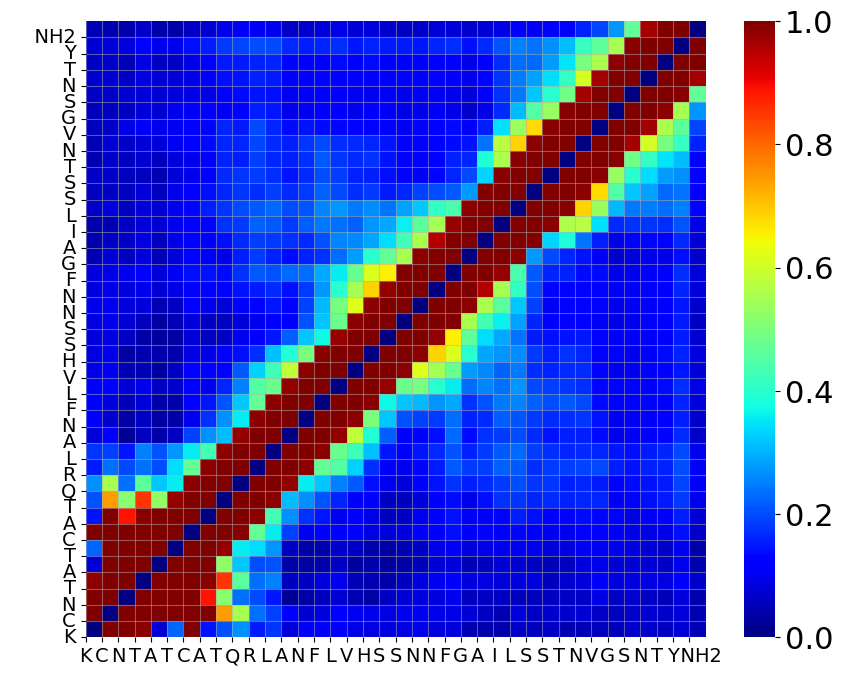

In [180]:
mpl.rcParams.update(mpl.rcParamsDefault)
contact_map = np.loadtxt(outdir + 'contactmap.dat', dtype=float)

plt.clf()
# Make distance map
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
im = sns.heatmap(contact_map, cmap='jet', ax=ax)
ax.grid(which='both', alpha=0.5)
plt.xticks(np.arange(0, len(residue_number_offsetres)), sequence_ol, rotation=0, size=14)
plt.yticks(np.arange(0, len(residue_number_offsetres)), sequence_ol, rotation=0, size=14)
cbar = im.collections[0].colorbar
cbar.ax.tick_params(labelsize=22)
ax.invert_yaxis()
plt.show()


# plt.savefig(outdir+'contact_map.png')
# plt.savefig(outdir+'contact_map.pdf')
plt.show()

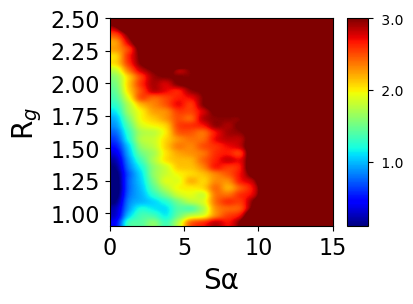

In [181]:
plt.figure(figsize=(3.6,2.7))
a, xedges, yedges = np.histogram2d(
    rg_CA, Sa_total, 30, [[0.9, 2.5], [0, 25.0]], density=True, weights=None)
a = np.log(np.flipud(a)+.000001)
T = 300
a = -(0.001987*T)*a

im = plt.imshow(a, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4, 5]

imaxes = plt.gca()
plt.xlim(0, 15)
plt.ylim(0.9,2.5)
plt.ylabel("R$_g$", size=20, labelpad=5)
plt.xlabel("Sα", size=20, labelpad=5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(size='16')
plt.yticks(size='16')
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                aspect=10)
#plt.axes(cb.ax)
plt.clim(vmin=0.1, vmax=3.0)
# np.savetxt(outdir+'Apo.Rg_v_Sa.dG.dat', a)
# plt.savefig(outdir+'Apo.Rg_v_Sa.dG.pdf', bbox_inches="tight",dpi=400)
plt.show()


In [182]:
plt.clf()
dists = np.arange(0, 10, 0.1)
def sigmoid(x, a, b):
      
    z = np.exp(-(a*x+b))
    sig = 1- 1 / (1 + z)

    return sig
# switch = (1.0-((dists-max)/min)**8)/(1-((dists-max)/min)**12)

# plt.plot(dists,sigmoid(dists, 3, -16.3))
# plt.show()


[2.181 0.584 0.167 ... 2.237 2.042 1.999]


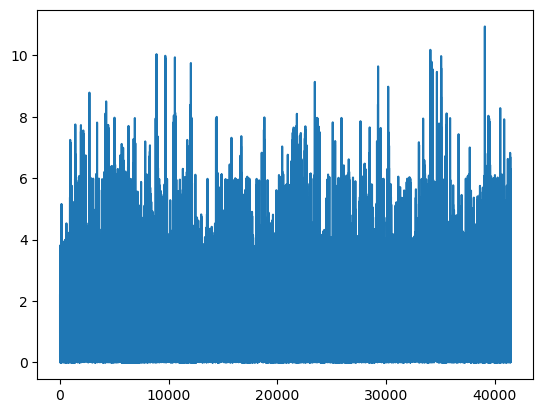

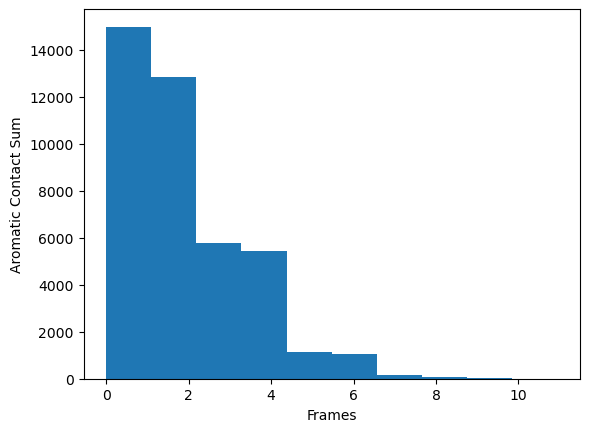

<Figure size 640x480 with 0 Axes>

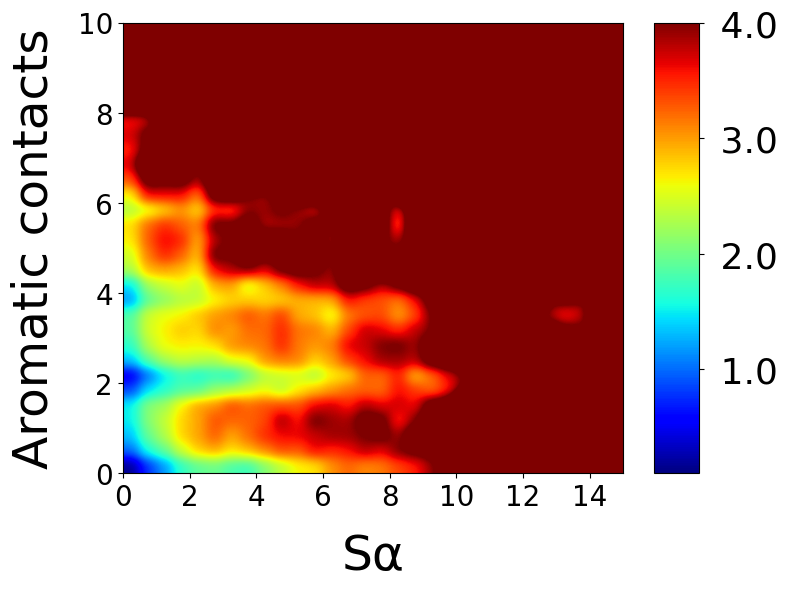

In [183]:
# Protein-protein
# Cut-off 4A, 7A
# 'closest-heavy'
prot_aromatic_res_index = [14, 17, 22, 36]
aromatic_contact_pairs = []
for i in range(len(prot_aromatic_res_index)):
    aromatic_contact_pair = []
    for j in range(len(prot_aromatic_res_index)): 
        pair = [prot_aromatic_res_index[i], prot_aromatic_res_index[j]]
        dist = md.compute_contacts(trj, [pair], scheme='closest-heavy')
        dists = np.asarray(dist[0]).astype(float)
        switch_aro = sigmoid(dists*10, 3, -16.3)
        aromatic_contact_pair.append(switch_aro)
    aromatic_contact_pairs.append(aromatic_contact_pair) 
aromatic_contact_pairs = np.asarray(aromatic_contact_pairs).astype(float)
aromatic_contact_sum = aromatic_contact_pairs.sum(axis = 0).sum(axis = 0)- len(prot_aromatic_res_index)
aromatic_contact_sum = aromatic_contact_sum[:,0]
print(aromatic_contact_sum)
plt.plot(aromatic_contact_sum)
plt.show()
plt.clf()

plt.hist(aromatic_contact_sum)
plt.xlabel("Frames")
plt.ylabel("Aromatic Contact Sum")
plt.show()
plt.clf()


dG, xedges, yedges = free_energy(aromatic_contact_sum, Sa_total, 300, 0, 10, 0, 15)

fig = plt.figure(figsize=(8, 6))
im = plt.imshow(dG, interpolation='gaussian', extent=[
                yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
cbar_ticks = [0, 1, 2, 3, 4]
cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'),
                  aspect=10)  # grab the Colorbar instance
imaxes = plt.gca()
plt.xlabel("Sα", size=35, labelpad=15)
plt.ylabel("Aromatic contacts", size=35, labelpad=15)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xticks(size='20')
plt.yticks(size='20')
plt.axes(cb.ax)
plt.clim(vmin=0.1, vmax=4.0)
plt.yticks(size='26')
plt.tight_layout()
plt.show()
# np.savetxt(outdir+'Sa_v_aromatic.dG.dat', dG)
# plt.savefig(outdir+'Sa_v_aromatic.pdf')

In [184]:
# Sa_vs_aromatic = np.column_stack((Sa_total, aromatic_contact_sum))
# Sa_min = [0,0,2]
# Sa_max = [2,2,4]
# aromatic_min = [5, 15,5]
# aromatic_max = [15, 25,15]
# basin = []
# for i in range(len(Sa_min)):
#     Sa_basin = np.where((Sa_vs_aromatic[:, 0] > Sa_min[i]) & (Sa_vs_aromatic[:, 0] < Sa_max[i]))[0]
#     aromatic_basin = np.where((Sa_vs_aromatic[:, 1] > aromatic_min[i]) & (Sa_vs_aromatic[:, 1] < aromatic_max[i]))[0]
#     basin_index = np.intersect1d(Sa_basin, aromatic_basin)
#     newtraj = trj[basin_index]
#     md.Trajectory.save_xtc(newtraj, outdir + 'Sa.aromatic.%s.xtc' % i)
#     print(newtraj)
#     basin.append(basin_index)
# print(basin)

In [185]:
trj = trj.slice(np.arange(1, trj.n_frames-1)) # remove first two frames to avoid artifacts from the initial structure/ frames not computed with reweighting 
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [186]:
phi_dict={}
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}
top = trj.top
for i in range(0,len(indices_phi)):
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]

In [187]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
        plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
        plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
        plt.xlabel('$\chi_1$', size=18)
        plt.ylabel('counts', size=18)
        plt.tick_params(labelsize=18)
        plt.show()
        plt.clf()   
    
    if res in dihedral_dict['chi2']:
     print("here")
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return

In [188]:
def get_xyz_from_indx(indx): 
    return trj.xyz [:,indx]

In [189]:
def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.colorbar()
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

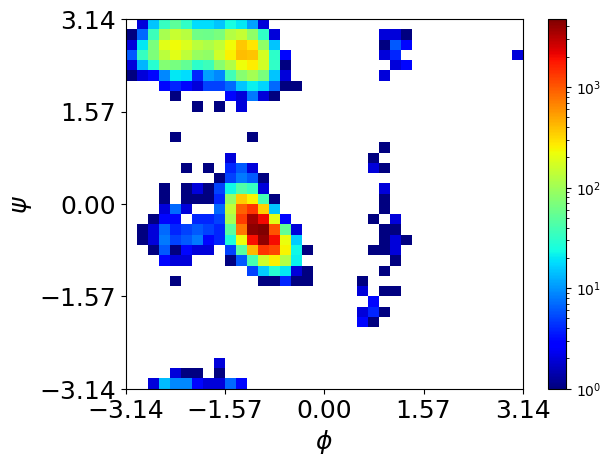

In [190]:
plot_phipsi(4)

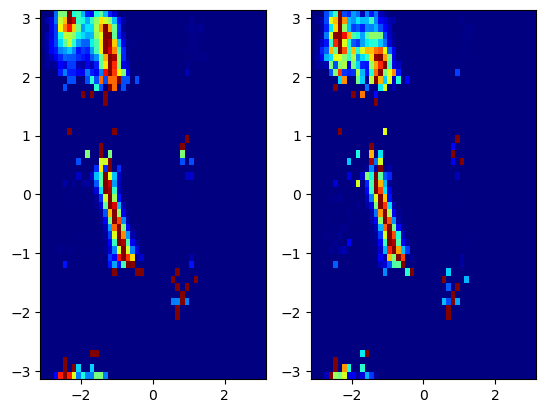

In [191]:
from sklearn.preprocessing import MinMaxScaler
res=4
fig, (ax1, ax2) = plt.subplots(ncols=2,)
H, xedges, yedges = np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=50,range=[[-3.14,3.14],[-3.14,3.14]], density=True)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(H)
scaled = scaler.transform(H)
ax1.pcolormesh(xedges, yedges, scaled.T, cmap='jet')

H_reweight, xedges_reweight, yedges_reweight = np.histogram2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=50,range=[[-3.14,3.14],[-3.14,3.14]],weights= weights, density=True)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(H_reweight)
scaled = scaler.transform(H_reweight)


ax2.pcolormesh(xedges_reweight, yedges_reweight, scaled.T, cmap='jet', rasterized=True)
plt.show()

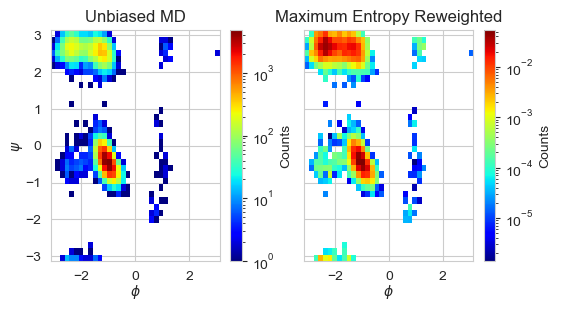

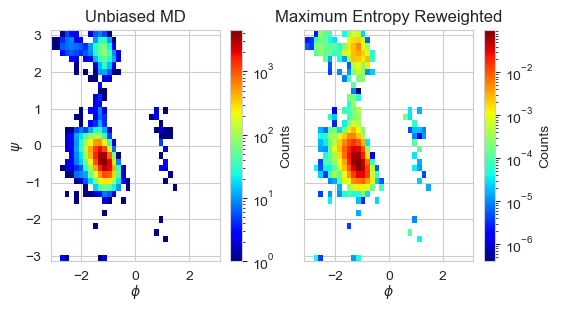

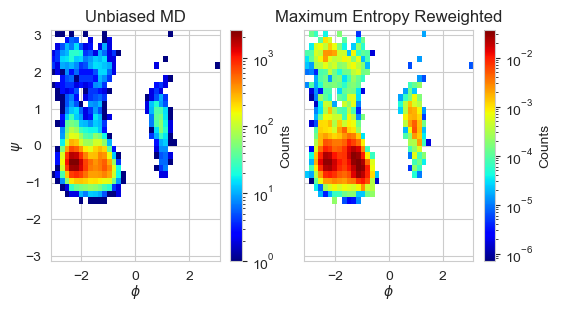

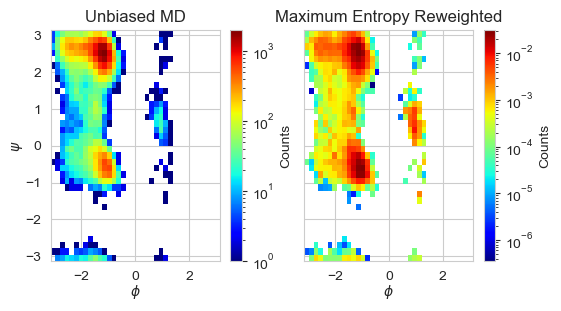

In [192]:
sns.set_style("whitegrid")
res_reweight = [4, 5, 6, 7]
for res in res_reweight: 
    nbins = 36 
    fig, ax= plt.subplots(figsize=(6, 3),ncols=2, nrows=1, sharey=True, sharex=True)
    ax1, ax2 = ax.flatten() # ax3, ax4 

    hist_i = ax1.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=nbins,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(), cmap="jet")
    ax1.set_xlabel(r'$\phi$', labelpad=0)
    ax1.set_ylabel(r"$\psi$", labelpad=0)
    ax1.set_title("Unbiased MD")

    hist_r = ax2.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=nbins,range=[[-3.14,3.14],[-3.14,3.14]],weights= weights, norm=colors.LogNorm(), cmap="jet")
    ax2.set_xlabel(r'$\phi$', labelpad=0)
    ax2.set_title("Maximum Entropy Reweighted")

    plt.colorbar(hist_i[3], ax=ax1, orientation='vertical', label='Counts')
    plt.colorbar(hist_r[3], ax=ax2, orientation='vertical', label='Counts')

    # hist_init = hist_i[0]/np.sum(hist_i[0])
    # hist_re = hist_r[0]/np.sum(hist_r[0])
    # hist_diff = hist_init - hist_re

    # ax[1,0].pcolorfast(xedges, yedges, hist_diff.T, cmap='seismic')
    # ax[1,1].pcolorfast(xedges, yedges, -hist_diff.T, norm = colors.LogNorm(), cmap='jet')

    plt.subplots_adjust(wspace=0.2)
    # plt.savefig(outdir + "ramachandran_unbiased_reweight_residue"+str(res)+".pdf", dpi=300, bbox_inches="tight")
    plt.show()


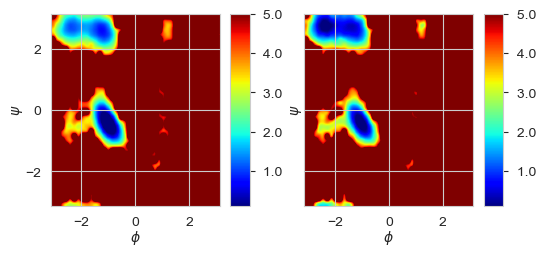

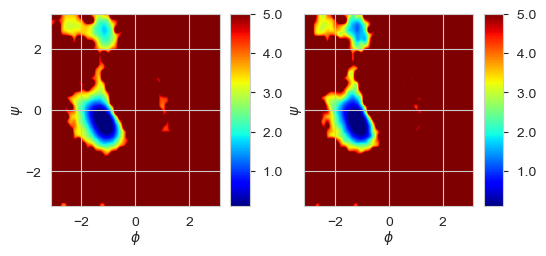

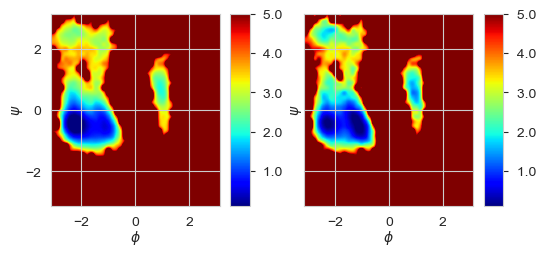

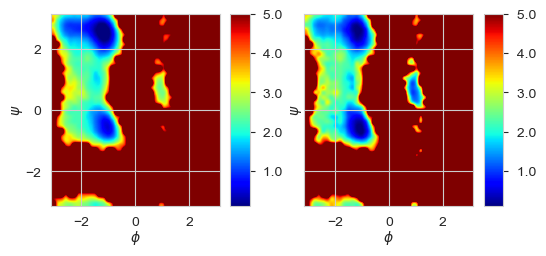

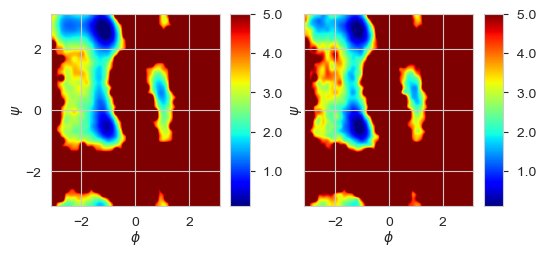

In [193]:
from sklearn.preprocessing import MinMaxScaler
sns.set_style("whitegrid")
res_reweight = [4, 5, 6, 7, 8]
for res in res_reweight: 
    nbins = 40 
    fig, ax= plt.subplots(figsize=(6, 2.5),ncols=2, nrows=1, sharey=True, sharex=True)
    ax1, ax2 = ax.flatten() # ax3, ax4 

    # free energy for unbiased MD
    a, xedges, yedges = np.histogram2d(
    dihedral_dict['psi'][res],dihedral_dict['phi'][res], nbins, [[-3.14, 3.14], [-3.14, 3.14]], density=True, weights=None)
    a = np.log(np.flipud(a)+.000001)
    T = 300
    a = -(0.001987*T)*a
    
    im = ax1.imshow(a, interpolation='gaussian', extent=[
                    yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
    cbar_ticks = [0, 1, 2, 3, 4, 5]

    imaxes = plt.gca()
    plt.xlim(-3.14, 3.14)
    plt.ylim(-3.14,3.14)
    cb = plt.colorbar(im, ticks=cbar_ticks, format=('% .1f'),
                    aspect=10)
    # plt.axes(cb.ax)
    im.set_clim(vmin=0.1, vmax=5.0) 

    # free energy for reweighted MD
    a, xedges, yedges = np.histogram2d(
    dihedral_dict['psi'][res],dihedral_dict['phi'][res], nbins, [[-3.14, 3.14], [-3.14, 3.14]], density=True, weights=weights)
    a = np.log(np.flipud(a)+.000001)
    T = 300
    a = -(0.001987*T)*a
    
    im = ax2.imshow(a,interpolation='gaussian', extent=[
                    yedges[0], yedges[-1], xedges[0], xedges[-1]], cmap='jet', aspect='auto')
    cbar_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]

    imaxes = plt.gca()
    plt.xlim(-3.14, 3.14)
    plt.ylim(-3.14,3.14)
    cb = plt.colorbar(im, ticks=cbar_ticks, format=('% .1f'),
                    aspect=10)
    #plt.axes(cb.ax)
    im.set_clim(vmin=0.1, vmax=5.0)
    ax1.set_xlabel(r'$\phi$', labelpad=0)
    ax1.set_ylabel(r"$\psi$", labelpad=0)
    ax2.set_xlabel(r'$\phi$', labelpad=0)
    ax2.set_ylabel(r"$\psi$", labelpad=0)
    plt.subplots_adjust(wspace=0.2)
    
    plt.savefig(outdir + "FE_ramachandran_unbiased_reweight_residue"+str(res)+".pdf", dpi=300, bbox_inches="tight")
    plt.show()

In [194]:
# x2 x3 x2p 
indxs = [[26,28,31,93], [28,31,93,90], [31,93,90,88]]
labels = ['$\chi_2$', '$\chi_3$', '$\chi_2\'$']
x2 = md.compute_dihedrals(trj,indxs)

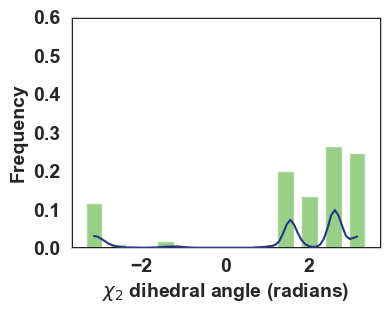

In [195]:
import pandas as pd
hfont = {"fontname":"arial"}
col = ['chi_2', 'chi_3', 'chi_2p']
df_ang = pd.DataFrame(data=x2, columns=col)
fig = plt.figure(figsize=(4,3), frameon=False, edgecolor="k")
#df_ang["chi_2"].hist(bins=6)
x = np.linspace(start=-3.14, stop=3.14, num=12)
plt.bar(x,df_ang['chi_2'].value_counts(bins=12, sort=False).to_numpy()/trj.n_frames, width=0.4, alpha=0.8, color="#81C469")
x = np.linspace(start=-3.14, stop=3.14, num=72)
y = df_ang['chi_2'].value_counts(bins=72, sort=False).to_numpy()/trj.n_frames
plt.plot(x,y, "-", color="#253685")
plt.xlabel("$\chi_{2}$ dihedral angle (radians)", fontweight="bold", fontsize=14, **hfont)
plt.ylabel("Frequency", fontweight="bold", fontsize=14, **hfont)
plt.xticks(fontweight="bold", fontsize=14)
plt.yticks(fontweight="bold", fontsize=14)
plt.grid(visible=False)
#plt.axhline(linewidth=2, color="k")
plt.axhspan(0, 0,linewidth=2, color="k")
plt.axhspan(0.6, 0.6,linewidth=2, color="k")
#plt.axvline(linewidth=2, color="k")
plt.axvspan(-3.7,-3.7, linewidth=2, color="k")
plt.axvspan(3.7,3.7, linewidth=2, color="k")
plt.xlim((-3.7,3.7))
plt.ylim((0, 0.6))
plt.show()

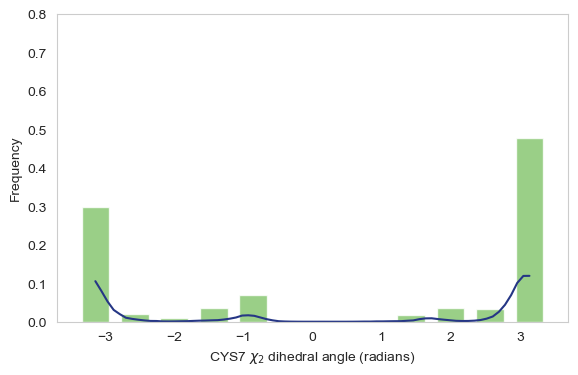

In [196]:
fig = plt.figure(figsize=(6.6,4), frameon=False, edgecolor="k")
#df_ang["chi_2"].hist(bins=6)
x = np.linspace(start=-3.14, stop=3.14, num=12)
plt.bar(x,df_ang['chi_2p'].value_counts(bins=12, sort=False).to_numpy()/trj.n_frames, width=0.4, alpha=0.8, color="#81C469")
x = np.linspace(start=-3.14, stop=3.14, num=72)
y = df_ang['chi_2p'].value_counts(bins=72, sort=False).to_numpy()/trj.n_frames
plt.plot(x,y, "-", color="#253685")
plt.xlabel("CYS7 $\chi_{2}$ dihedral angle (radians)", **hfont)
plt.ylabel("Frequency", **hfont)
# plt.xticks(fontweight="bold", fontsize=14)
# plt.yticks(fontweight="bold", fontsize=14)
plt.grid(visible=False)
#plt.axhline(linewidth=2, color="k")
# plt.axhspan(0, 0,linewidth=2, color="k")
# plt.axhspan(0.8, 0.8,linewidth=2, color="k")
#plt.axvline(linewidth=2, color="k")
# plt.axvspan(-3.7,-3.7, linewidth=2, color="k")
# plt.axvspan(3.7,3.7, linewidth=2, color="k")
plt.xlim((-3.7,3.7))
plt.ylim((0, 0.8))

plt.show()

In [197]:
sum_chi2_12 = ((df_ang['chi_2p'].value_counts(bins=12, sort=False).to_numpy()/trj.n_frames) + (df_ang['chi_2'].value_counts(bins=12, sort=False).to_numpy()/trj.n_frames))/2
sum_chi2_72 = ((df_ang['chi_2p'].value_counts(bins=72, sort=False).to_numpy()/trj.n_frames) + (df_ang['chi_2'].value_counts(bins=72, sort=False).to_numpy()/trj.n_frames))/2

<Figure size 640x480 with 0 Axes>

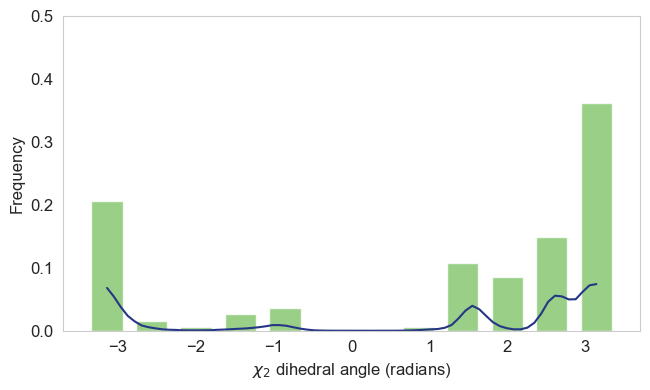

In [198]:
import pandas as pd
hfont = {"fontname":"arial"}
col = ['chi_2', 'chi_3', 'chi_2p']
df_ang = pd.DataFrame(data=x2, columns=col)
plt.clf()
fig = plt.figure(figsize=(6.6,4), frameon=False, edgecolor="k")
#df_ang["chi_2"].hist(bins=6)
x = np.linspace(start=-3.14, stop=3.14, num=12)

plt.bar(x,sum_chi2_12, width=0.4, alpha=0.8, color="#81C469")

x = np.linspace(start=-3.14, stop=3.14, num=72)
y = sum_chi2_72
plt.plot(x,y, "-", color="#253685")
plt.xlabel("$\chi_{2}$ dihedral angle (radians)", fontsize=12, **hfont)
plt.ylabel("Frequency", fontsize=12, **hfont)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.grid(visible=False)
# #plt.axhline(linewidth=2, color="k")
# plt.axhspan(0, 0,linewidth=2, color="k")
# plt.axhspan(0.6, 0.6,linewidth=2, color="k")
# #plt.axvline(linewidth=2, color="k")
# plt.axvspan(-3.7,-3.7, linewidth=2, color="k")
# plt.axvspan(3.7,3.7, linewidth=2, color="k")
plt.xlim((-3.7,3.7))
plt.ylim((0, 0.5))
plt.tight_layout()
plt.savefig(outdir + "chi2_dihedral_angle.pdf", dpi=300)
plt.show()


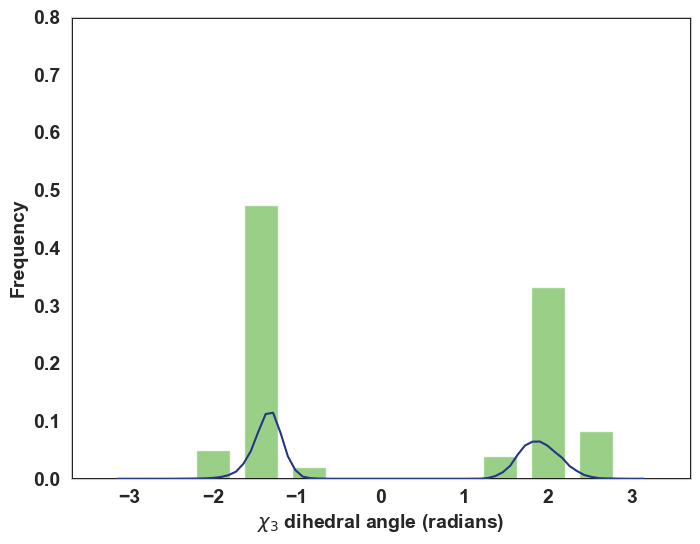

In [199]:
fig = plt.figure(figsize=(8,6), frameon=False, edgecolor="k")
#df_ang["chi_2"].hist(bins=6)
x = np.linspace(start=-3.14, stop=3.14, num=12)
plt.bar(x,df_ang['chi_3'].value_counts(bins=12, sort=False).to_numpy()/trj.n_frames, width=0.4, alpha=0.8, color="#81C469")
x = np.linspace(start=-3.14, stop=3.14, num=72)
y = df_ang['chi_3'].value_counts(bins=72, sort=False).to_numpy()/trj.n_frames
plt.plot(x,y, "-", color="#253685")
plt.xlabel("$\chi_{3}$ dihedral angle (radians)", fontweight="bold", fontsize=14, **hfont)
plt.ylabel("Frequency", fontweight="bold", fontsize=14, **hfont)
plt.xticks(fontweight="bold", fontsize=14)
plt.yticks(fontweight="bold", fontsize=14)
plt.grid(visible=False)
#plt.axhline(linewidth=2, color="k")
plt.axhspan(0, 0,linewidth=2, color="k")
plt.axhspan(0.8, 0.8,linewidth=2, color="k")
#plt.axvline(linewidth=2, color="k")
plt.axvspan(-3.7,-3.7, linewidth=2, color="k")
plt.axvspan(3.7,3.7, linewidth=2, color="k")
plt.xlim((-3.7,3.7))
plt.ylim((0, 0.8))
plt.show()

Check the distribution of the disulfide bond in pdb id: 5MGQ 

In [200]:
trj_5mgq = md.load("../structure_files/5mgq.pdb")

/Users/f006j60/miniconda3/envs/interface_app/lib/python3.11/site-packages/mdtraj/formats/pdb/pdbfile.py:208: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn(


(20, 3)


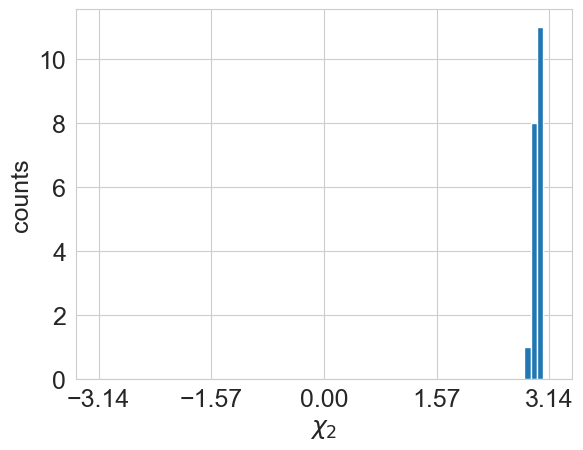

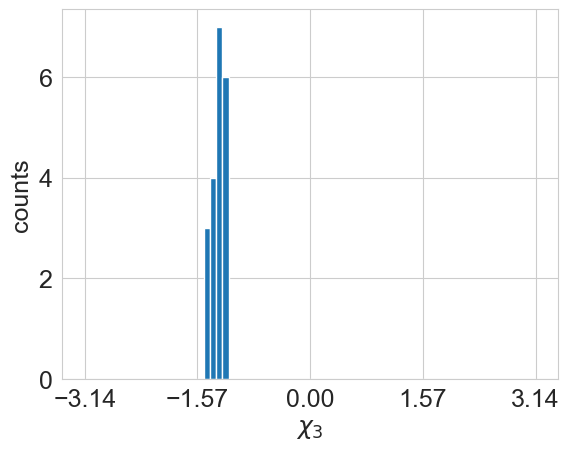

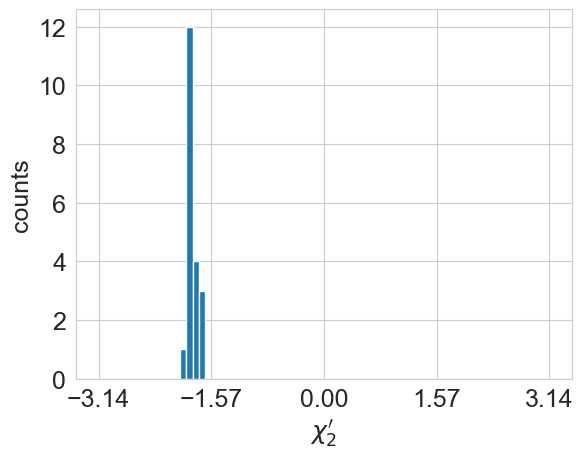

In [201]:
indxs = [[25,28,29,91], [28,29,91,90], [29,91,90,87]]

labels = ['$\chi_2$', '$\chi_3$', '$\chi_2\'$']

x2 = md.compute_dihedrals(trj_5mgq,indxs)
print(x2.shape)
for i in range(3):
    angle_ls = x2[:,i] 
    lab = labels[i]
    plt.hist(angle_ls,bins=72,range=[-3.14,3.14])      
    plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
    plt.xlabel(lab, size=18)
    plt.ylabel('counts', size=18)
    plt.tick_params(labelsize=18)
    #plt.plot(angle_ls)
    plt.show()

## Circuit Topology Analysis

In [202]:
from matplotlib.colors import ListedColormap
from cycler import cycler
from matplotlib import colormaps 
import pickle

# Define the number of shades in the gradient
num_grays = 8
# Create a list of distinct gray values
grays = np.linspace(0.0, 0.8, num_grays)
# Create a ListedColormap with distinct gray values
custom_pastel_gray_cmap = ListedColormap([(gray, gray, gray) for gray in grays])

# create color map and cycler for clusters 
max_num_clusters = 6
viridis = colormaps['viridis'].resampled(max_num_clusters)
default_cycler = cycler(color=viridis(range(max_num_clusters)))
viridis_hex = ['#440154', '#414487', '#2a788e', '#22a884', '#7ad151', '#fde725']

######## Clusters ########
with open(outdir+"/_concat_all_6c_kmeans_cluster_indices.pkl", "rb") as f: 
    c_dict = pickle.load(f)

## Circuit Topology Figures 

In [203]:
from scipy.sparse import csr_matrix, save_npz, load_npz
sparse_circuit_matrix = load_npz(outdir + "ctop_model.npz")
viridis = colormaps['viridis'].resampled(7)
trj = md.load(rep0, top=pdb, stride=1)

In [204]:
def create_combos_map(prot_len):
    """
    create all pair combinations and map to an index 
    """
    combinations = []
    for i in range(prot_len):
        for j in range(i+2, prot_len): 
            combinations.append((i,j))
    combos = np.array(combinations)
    
    map_dict = {}
    for num, k in enumerate(combos):
        map_dict[tuple(k)] = num

    return map_dict

In [205]:
map_combos = create_combos_map(38)

count = 0 
switch_first_index = []
index_order = []

for key in map_combos.keys(): 
    if count == key[0]:
        switch_first_index.append(map_combos[key])
        index_order.append(count+1) ## off by 1 
        count += 1 


In [206]:
def count_vals_per_row(csr, val):
    """
    Takes a sparse matrix and counts the number of values in that matrix. 
    """
    counts = np.zeros(csr.shape[0], dtype=int)
    for i in range(csr.shape[0]):
        row_data = csr.data[csr.indptr[i]:csr.indptr[i+1]]
        counts[i] = np.count_nonzero(row_data == val)
    return counts/csr.shape[1] # return a fraction 

In [207]:
s_counts = count_vals_per_row(sparse_circuit_matrix, 1) + count_vals_per_row(sparse_circuit_matrix, 7)
p_counts = count_vals_per_row(sparse_circuit_matrix, 2) + count_vals_per_row(sparse_circuit_matrix, 3) + count_vals_per_row(sparse_circuit_matrix, 5) + count_vals_per_row(sparse_circuit_matrix, 6)
x_counts = count_vals_per_row(sparse_circuit_matrix, 4)

In [208]:
topology_assn = np.column_stack((s_counts, p_counts))
topology_assn = np.column_stack((topology_assn, x_counts))
np.save(outdir + "topology_per_frame.npy", topology_assn)

In [209]:
sns.kdeplot(s_counts, label="Series", c=viridis.colors[0], bw_adjust=2.0)
sns.kdeplot(p_counts, label="Parallel", c=viridis.colors[3], bw_adjust=2.0)
sns.kdeplot(x_counts, label="Crossing", c= viridis.colors[6], bw_adjust=2.0)

plt.legend()

In [210]:
# plot for each cluster 
table_by_cluster = np.zeros((len(c_dict)+1, 3))

fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, figsize=(6.6,6.6))
print(f"cluster \tparallel\tseries\tcrossing")
for n,ax in enumerate(axs.flatten()): 
    idxs = c_dict[n]
    csr_matrx = sparse_circuit_matrix[idxs]
    
    # based on matrix assignments 
    s_counts = count_vals_per_row(csr_matrx, 1) + count_vals_per_row(csr_matrx, 7)
    p_counts = count_vals_per_row(csr_matrx, 2) + count_vals_per_row(csr_matrx, 3) \
        + count_vals_per_row(csr_matrx, 5) + count_vals_per_row(csr_matrx, 6)
    x_counts = count_vals_per_row(csr_matrx, 4)

    sns.kdeplot(s_counts, label="Series", c=viridis.colors[0], ax=ax)
    sns.kdeplot(p_counts, label="Parallel", c=viridis.colors[3], ax=ax)
    sns.kdeplot(x_counts, label="Crossing", c= viridis.colors[6], ax=ax)

    ax.set_title("Cluster " + str(n+1))

    # print line in cluster 
    # print(f"cluster {n+1}\t{np.median(s_counts):.2f}\t{np.median(p_counts):.2f}\t{np.median(x_counts):.2f}")
    print(f"cluster {n+1}\t{np.average(p_counts):.2f}\t{np.average(s_counts):.2f}\t{np.average(x_counts):.2f}")
    table_by_cluster[n,0] = np.average(p_counts)
    table_by_cluster[n,1] = np.average(s_counts)
    table_by_cluster[n,2] = np.average(x_counts)    

# total 
s_counts = count_vals_per_row(sparse_circuit_matrix, 1) + count_vals_per_row(sparse_circuit_matrix, 7)
p_counts = count_vals_per_row(sparse_circuit_matrix, 2) + count_vals_per_row(sparse_circuit_matrix, 3) + count_vals_per_row(sparse_circuit_matrix, 5) + count_vals_per_row(sparse_circuit_matrix, 6)
x_counts = count_vals_per_row(sparse_circuit_matrix, 4)

table_by_cluster[-1,0] = np.average(p_counts)
table_by_cluster[-1,1] = np.average(s_counts)
table_by_cluster[-1,2] = np.average(x_counts)

print(f"total  \t{np.average(p_counts):.2f}\t{np.average(s_counts):.2f}\t{np.average(x_counts):.2f}")
plt.legend()
plt.xlim(0.0,0.2)

cluster 	parallel	series	crossing
cluster 1	0.07	0.08	0.04
cluster 2	0.12	0.09	0.07
cluster 3	0.11	0.08	0.08
cluster 4	0.02	0.08	0.02
cluster 5	0.11	0.12	0.08
cluster 6	0.07	0.07	0.04
total  	0.05	0.08	0.03


(0.0, 0.2)

In [211]:
import seaborn as sns 

plt.figure(figsize=(3.3, 3.3))
sns.heatmap(table_by_cluster, cmap="Reds", cbar=False, annot=True, fmt=".2f", linewidths=.5)
plt.xticks([0.5,1.5,2.5], ['Parallel', 'Series', 'Crossing'], fontsize=10)
plt.yticks(np.arange(len(c_dict)+1) +0.5, ['Cluster ' + str(i+1) for i in range(len(c_dict))] + ['Total'], fontsize=10, rotation=0)
plt.tight_layout()


If I have each frame in a cluster contribute a population of 1, then summing all the indices of the frames in a cluster will give the reweighted population. 

In [212]:
for i in range(len(c_dict.keys())):
    frame_ind = c_dict[i]
    # keep in mind the offset by one since we get rid of the first frame
    frame_ind -= 1 

    filtered_ind = frame_ind[frame_ind <= len(weights)-1]
    filtered_ind = filtered_ind[filtered_ind >= 0]

    print("Cluster " + str(i+1) + ":",np.sum(weights[filtered_ind]))
    

Cluster 1: 0.13552304858699998
Cluster 2: 0.05141110459999999
Cluster 3: 0.07760233331500001
Cluster 4: 0.550785260237
Cluster 5: 0.007421201846
Cluster 6: 0.17725705136300002


In [213]:
# check contact maps 
# ☕ may take a while 
contact_maps = []
distance_maps = []
populations = []

# trjs = []
for i in range(len(c_dict.keys())):
    frame_ind = c_dict[i]
    temptrj = trj.slice(frame_ind)
    
    print(temptrj.n_frames)
    populations.append(np.round(temptrj.n_frames/trj.n_frames*100, 2))
    # trjs.append(trj)
    # contact map 
    final_map, final_distance = contact_map_avg(temptrj, prot_len=38, cutoff=0.8)
    contact_maps.append(final_map)
    distance_maps.append(final_distance)

5997
2264
4028
22268
525
6419


 C1, P=14.45
 C2, P=5.46
 C3, P=9.71
 C4, P=53.66
 C5, P=1.27
 C6, P=15.47


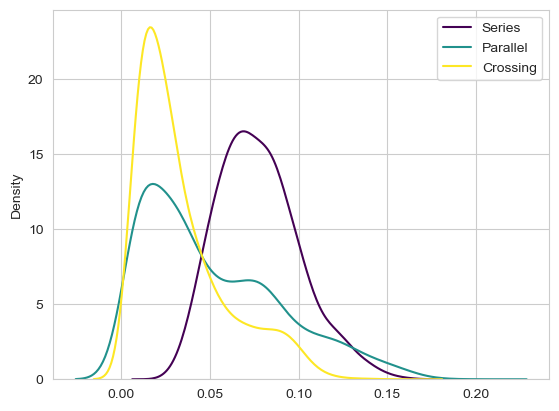

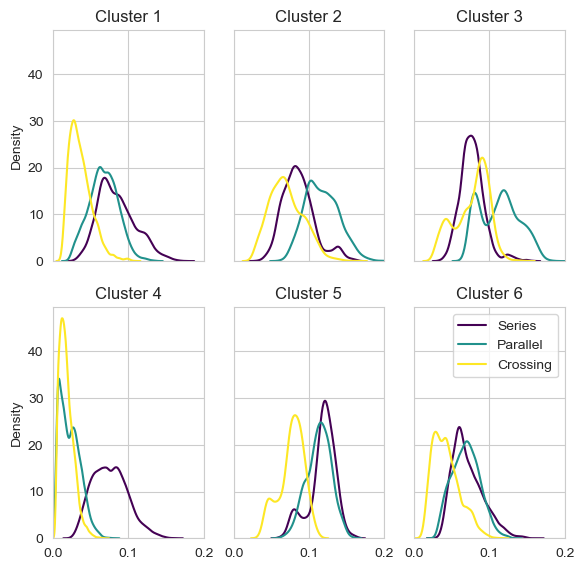

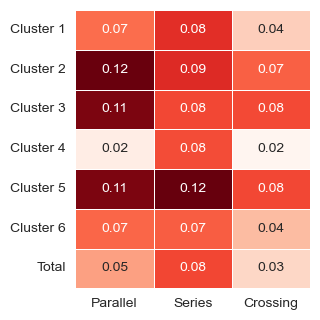

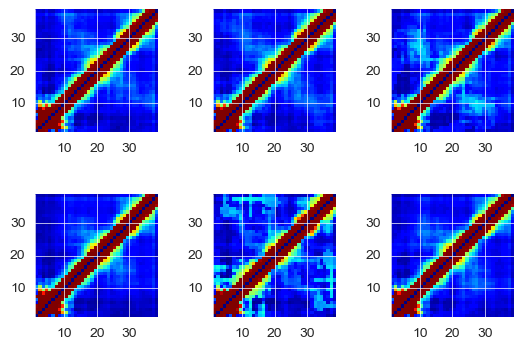

In [214]:
# contact maps no labels 
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(6.5,4))
n_clusters = 6
for mapi, ax in enumerate(axs.flatten()): 
    if mapi > n_clusters-1: 
        continue 
    im = sns.heatmap(contact_maps[mapi], cmap='jet', ax=ax, vmin=0.0, vmax = 1.0, square=True, cbar=False)
    ax.grid(which='major', alpha=0.5)
    ax.set_xticks([9, 19, 29], [ 10, 20, 30], rotation=0, size=10)
    ax.set_yticks([9,19,29], [ 10, 20, 30], rotation=0, size=10)
    ax.invert_yaxis()
    ax.set_ylim(0,38.0)
    ax.set_xlim(0,38.0)
    for x in [0, 9, 19, 29]:
        ax.axvline(x=x, color='white', linestyle='-', linewidth=0.5)
        ax.axhline(y=x, color='white', linestyle='-', linewidth=0.5)
    print(' C%s' % str(mapi+1) + ", P=" + str(populations[mapi]))

plt.subplots_adjust( hspace=0.5)  # Increased vertical spacing
plt.savefig(outdir+"/wt_iapp_apo_contact_by_cluster.pdf", dpi=400)
plt.show()

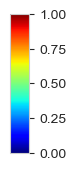

In [215]:
# Create a separate figure for the colorbar
fig_colorbar, ax_cbar = plt.subplots(figsize=(0.25, 1.8))  # Set width to 0.5 for a slim colorbar

# Generate a colorbar with the same colormap and value range
norm = mpl.colors.Normalize(vmin=0.0, vmax=1.0)
cbar = mpl.colorbar.ColorbarBase(ax_cbar, cmap='jet', norm=norm)

# Label the colorbar, if desired
# cbar.set_label('Contact Probability')

plt.savefig(outdir+"/wt_iapp_apo_contact_by_cluster_cbar.pdf", dpi=400, bbox_inches="tight")

plt.show()

/Users/f006j60/git/hIAPP_monomer_simulations/scripts/tools.py:63: RuntimeWarning: invalid value encountered in divide
  M = (cumsum( ((gamma/s)**2*2**arange(1,d+1)[::-1])[::-1] )  )[::-1]


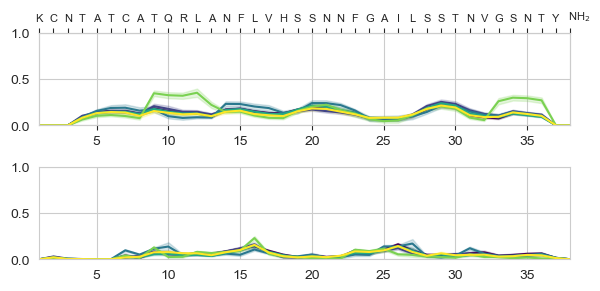

In [216]:
fig, axes = plt.subplots(2, 1, figsize=(6,3.0))

for i in range(6): 
    H1_H, H1_E = dssp_convert(dsspH1[c_dict[i]])

    axes[0].plot(residue_number_offsetres, H1_H[:, 0], label='Helix', color=viridis_hex[i])
    axes[0].fill_between(residue_number_offsetres, H1_H[:, 0]-H1_H[:, 1],
                     H1_H[:, 0]+H1_H[:, 1], alpha=0.2, color=viridis_hex[i])
    axes[0].set_xlim(1,38)
    axes[0].set_ylim(0,1.0)
    
    axes[1].plot(residue_number_offsetres, H1_E[:, 0], label='Sheet', color=viridis_hex[i])
    axes[1].fill_between(residue_number_offsetres, H1_E[:, 0]-H1_E[:, 1],
                     H1_E[:, 0]+H1_E[:, 1], alpha=0.2, color=viridis_hex[i])
    axes[1].set_xlim(1,38)
    axes[1].set_ylim(0,1.0)
ax2 = axes[0].twiny()
top_ticks = np.arange(0, 38, 1)
plt.grid(True)
plt.tight_layout()
ax2.set_xticks(top_ticks)
ax2.set_xticklabels([f'{i}' for i in sequence_ol_wt[0::1]], fontsize=8)
ax2.grid(False)
plt.savefig(outdir+'/Hprop.Eprop.wt.apo.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [217]:
# # save the trajectory for each cluster 
# traj_outdir = "/Users/f006j60/Robustelli_Group/IAPP/cluster_files_01.22.25/wt_hiapp_apo/"

# psystem = "wt_hiapp_apo"
# for c in range(len(c_dict.keys())): 
#         # get only the cluster and compute centroid
#         temp = trj.slice(c_dict[c])
#         c_i = get_centroid(temp)

#         # save the files         
#         c_file = traj_outdir + psystem + "_centroid_c" + str(c+1) + "_b"+ str(n)+".gro"
#         trj_file = traj_outdir + psystem+ "_c" + str(c+1)+ "_b"+ str(n) + ".xtc"
#         temp.slice(c_i).save_gro(c_file)
#         temp.save_xtc(trj_file)


In [218]:
# # compute SASA uncomment for the first time around
# solv = md.shrake_rupley(trj, mode="residue")
# np.save(outdir+"/sasa.npy", solv)

27.854052 52.50386 0.8179581622042084 2.718566810738399 0 23
27.854052 52.50386 0.8179581622042084 2.718566810738399 0 23
27.854052 52.50386 0.8179581622042084 2.718566810738399 0 23


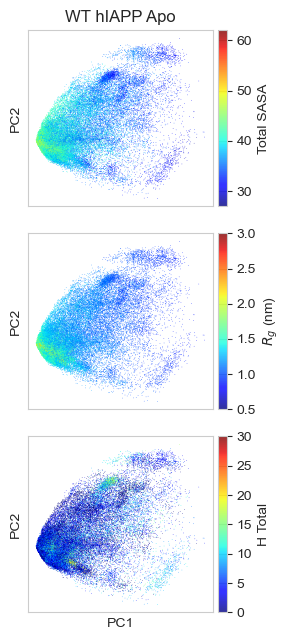

In [219]:
from mpl_toolkits.axes_grid1 import make_axes_locatable 
PCs = np.load(outdir+"/concat_all_incpca.npy")
bds = [[0,28], [27,62], [0.5,3.0], [0,30]]

# load in quantities 
Rg = np.load(outdir+"/Rg_total" + ".npy")
Sa = np.load(outdir+"/Sa_total" + ".npy")
H_tot = np.load(outdir+"/H_total" + ".npy")
solv_sum = np.sum(np.load(outdir+"/sasa.npy"), axis=1)

# labels 
cbar_lbl = ["Total SASA", "$R_g$ (nm)", "H Total"]

# create one plot to show all 4 quantities 
fig, axes = plt.subplots(3,1, figsize=(3,6.5), sharey=True, sharex=True)
ax = axes.flatten()

# project onto the surface 
for k, var in enumerate([solv_sum, Rg, H_tot]): 
    print(solv_sum.min(), solv_sum.max(), Rg.min(), Rg.max(), H_tot.min(), H_tot.max())
    scatt = ax[k].scatter(PCs[:,0],PCs[:,1], marker = ".", alpha=0.8, c=var, cmap="jet", s=1, edgecolors="None", vmin=bds[k+1][0], vmax=bds[k+1][1])
    # ax.legend(loc='best', ncol=1)
    
    ax[k].set_ylabel("PC2")
    
    ax[k].grid(False)
    ax[k].set_xticks([])
    ax[k].set_yticks([])
    # Add color bar
    divider = make_axes_locatable(ax[k])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(scatt, cax=cax)
    cbar.set_label(cbar_lbl[k],fontsize=10)  # Set your desired label
axes[0].set_title("WT hIAPP Apo")
axes[-1].set_xlabel("PC1")
plt.tight_layout()
# plt.savefig( outdir + "project_SASA_Rg_H_total.png", dpi=400, bbox_inches="tight")
plt.show()